# Data Visualization in Python
Take data and turn it into something colorful, graphical and meaningful :) 


## Intro
Data visualization allows data scientists to graphically represent data to extract and understand trends, outliers, patterns and further insights in the data.

Python has many **many** graphing libraries with different features and it can be daunting to know which library to use.  This intro tutorial will focus on a few popular plotting libraries:
* **Pandas** - built on Matplotlib and easy to use with Pandas dataframes
* **Matplotlib** - massive library with lots of flexibility (stackoverflow will be your friend!)
* **Seaborn** - statistical visualization with default themes and beautiful styles
* **Plotnine** - based on gglot2 for all my R peeps!

For interactive plots and possibly a feature tutorial
* Plotly
* D3
* Bokeh


This tutorial compares Matplotlib, Pandas, Seaborn and Plotnine for the following visualizations:
* Scatter Plots 
* Line Charts 
* Histograms 
* Bar Charts 
* Box Plots 
* Pie Charts 
* Heatmaps 
* Faceting
* Pairplots



### Setup 
Personally, I prefer to use a Conda environment and/or Docker container (if you are interested in knowing more about these setups let me know).  The README includes the specific packages you will need for this tutorial.  Please make sure you can run the following line without any errors.

In [2]:
## Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from sklearn.datasets import load_wine, load_iris

%matplotlib inline

## Data 
Scikit-learn includes out of the box [datasets](https://scikit-learn.org/stable/datasets/index.html#]) which are great for practicing your data visualization skills.  We will use the classic wine and iris datasets - imported above.

Since most of the plotting libraries play very nicely with Pandas DataFrames, we will format the *wine* and *iris* dataset with Pandas.


In [3]:
# Load the wine data set into a Pandas dataframe and view the first 5 rows
wine = load_wine()
wine_df = pd.DataFrame(data= np.c_[wine.data, wine.target],
                 columns= list(wine.feature_names) + ['target'])
# Add class label
wine_df['class'] = pd.Categorical.from_codes(wine.target, wine.target_names)

# Show the top 5 rows of Dataframe
wine_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0,class_0


In [4]:
# Load the iris data set into a Pandas dataframe and view the first 5 rows
iris = load_iris()
iris_df =  pd.DataFrame(data= np.c_[iris.data, iris.target],
                 columns= list(iris.feature_names) + ['target'])

# Add class label
iris_df['class'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Show the top 5 rows of Dataframe
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


### Pandas DataFrame Descriptive Statistics
Don't forget to understand the statistics of your data!  You can also stylize your dataframe like you might in a csv.  There are ways to add visual impact to quantitative data.

If you need a brief statistical refresher especially in the context of Python please see [Python Statistics Fundamentals: How to Describe Your Data](https://realpython.com/python-statistics/).

In [6]:
# Generate descriptive statistics of your DataFrame
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [7]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
#Example using a color gradient to display data values in the DataFrame
# For max/min use highlight_max()/highlight_min()


In [13]:
iris_df.head(10).style.background_gradient(subset=['sepal length (cm)', 'petal length (cm)'], cmap='BuGn').background_gradient(subset=['sepal width (cm)', 'petal width (cm)'], cmap='PuRd').highlight_max(color='blue').highlight_min(color='red')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.100000,3.500000,1.400000,0.200000,0.000000,setosa
1,4.900000,3.000000,1.400000,0.200000,0.000000,setosa
2,4.700000,3.200000,1.300000,0.200000,0.000000,setosa
3,4.600000,3.100000,1.500000,0.200000,0.000000,setosa
4,5.000000,3.600000,1.400000,0.200000,0.000000,setosa
5,5.400000,3.900000,1.700000,0.400000,0.000000,setosa
6,4.600000,3.400000,1.400000,0.300000,0.000000,setosa
7,5.000000,3.400000,1.500000,0.200000,0.000000,setosa
8,4.400000,2.900000,1.400000,0.200000,0.000000,setosa
9,4.900000,3.100000,1.500000,0.100000,0.000000,setosa


# Scatter Plots
The x-y plot or scatter plot represents the pairs of data from two datasets.

### Matplotlib
Use **scatter** or use **plt.subplots** to stylize our plot with title and labels.

Text(0, 0.5, 'sepal width (cm)')

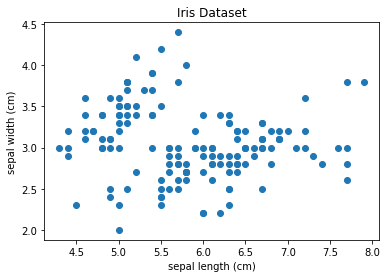

In [15]:
# create a figure and axis
fig, ax = plt.subplots()

spl_len_str = 'sepal length (cm)'
spl_wid_str = 'sepal width (cm)'

# scatter the sepal_length against the sepal_width
ax.scatter(iris_df[spl_len_str],iris_df[spl_wid_str])

# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')

The plot would have more meaning if the data points are colored by class.  In Matplotlib we can create a color dictionary and then assign a color for each class.

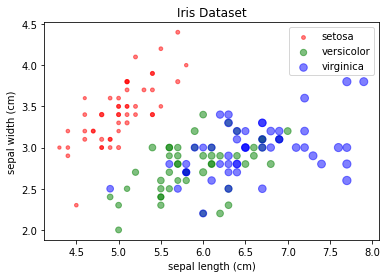

In [23]:
# create color dictionary
colors = {'setosa':'r', 'versicolor':'g', 'virginica':'b'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for c in np.unique(iris_df['class']):
    ax.scatter(iris_df['sepal length (cm)'].loc[iris_df['class']==c], 
               iris_df['sepal width (cm)'].loc[iris_df['class']==c],
               s=10*iris_df['petal length (cm)'].loc[iris_df['class']==c],
               alpha=0.5,
               color=colors[c],
               label = c)

# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.legend(loc='best')

### Pandas 
To create a scatter plot in Pandas we can call **dataset.plot.scatter()**. The axes labels will automatically be created from the DataFrame column names.

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

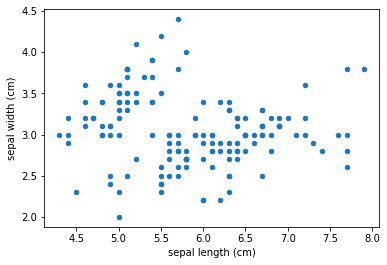

In [30]:
# create Pandas scatter plot
iris_df.plot.scatter(spl_len_str,spl_wid_str)

<AxesSubplot:title={'center':'Iris Dataset'}, xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

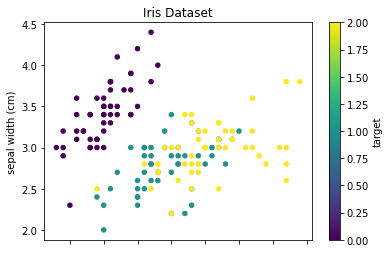

In [33]:
# Add coloring to plot by class 
# Note here we use the numeric target and not the class names
iris_df.plot.scatter(x='sepal length (cm)', 
                     y='sepal width (cm)', 
                     title='Iris Dataset', 
                     c='target',
                     colormap='viridis')

### Seaborn
Seaborn has a **.scatterplot** method to create a scatterplot similar to Pandas.

Text(0.5, 1.0, 'Iris Dataset')

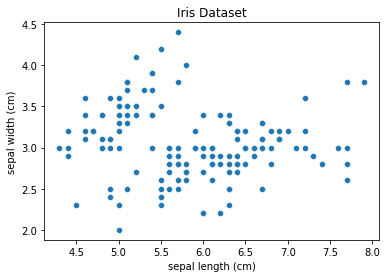

In [35]:
# create a seaborn scatter plot
sns.scatterplot(x=iris_df[spl_len_str],y=iris_df[spl_wid_str])
plt.title('Iris Dataset')

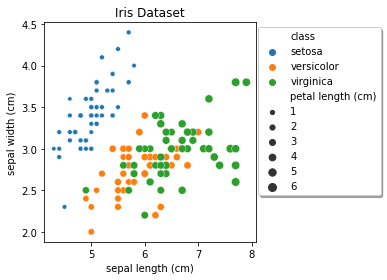

In [37]:
# add style to scatterplot by coloring by class
sns.scatterplot(x='sepal length (cm)', 
                y='sepal width (cm)',
                data=iris_df,
                hue = 'class',
                size='petal length (cm)')
plt.title('Iris Dataset')
plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1.0),
          fancybox=True, shadow=True, ncol=1)
plt.tight_layout()

### Plotnine
Use **geom_point()** for a basic scatter plot with plotnine.

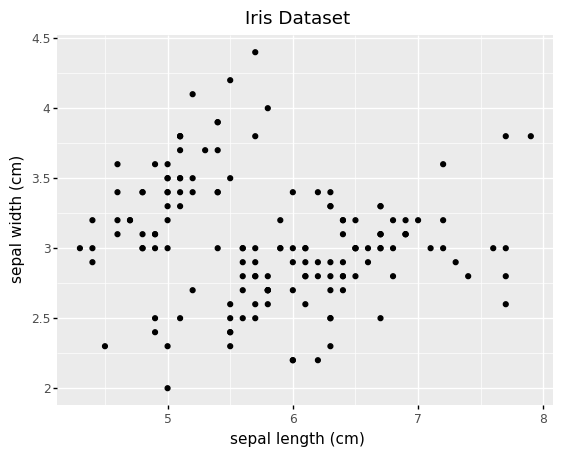

<ggplot: (8734541767777)>

In [39]:
# simple scatter plot with plotnine
(ggplot(iris_df, aes('sepal length (cm)', 'sepal width (cm)')) 
    + geom_point()
    + labs(title='Iris Dataset')
)

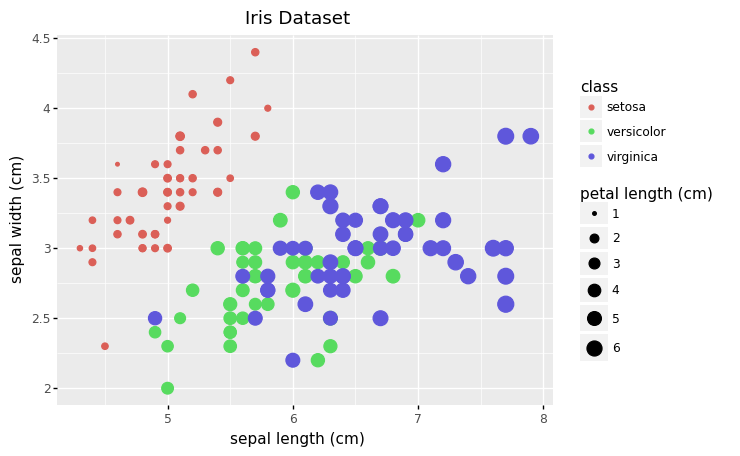

<ggplot: (8734538987310)>

In [40]:
# advanced styling with plotnine
(ggplot(iris_df, aes('sepal length (cm)', 'sepal width (cm)', color='class', size='petal length (cm)')) 
    + geom_point()
    + labs(title='Iris Dataset')
)

# Line Chart
One of the most fundamental plots - a line chart to display a series of data points. 

### Matplotlib
Call line-chart with the method **plot**.  Matplotlib will require a loop to plot multiple columns in one graph.

In [46]:
for col in columns:
    print(col)
    print(iris_df[col])

sepal length (cm)
0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64
sepal width (cm)
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64
petal length (cm)
0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal length (cm), Length: 150, dtype: float64
petal width (cm)
0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal width (cm), Length: 150, dtype: float64


In [50]:
x_data = range(0, iris_df.shape[0])
x_data

range(0, 150)

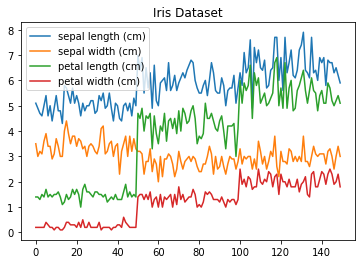

In [55]:
# get columns to plot
columns = iris_df.columns.drop(['target', 'class'])
# create x data
x = range(0, iris_df.shape[0])
    
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for col in columns:
    ax.plot(x, iris_df[col], label=col)

# set title and legend
ax.set_title('Iris Dataset')
ax.legend()

## Pandas 
Create line-chart with **.plot.line()** without any loops :) 

<AxesSubplot:>

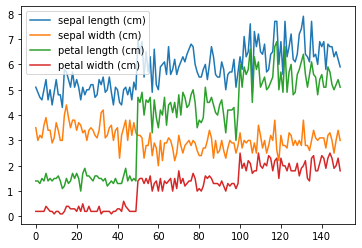

In [59]:
# pandas line chart
iris_df.drop(['target','class'],axis=1).plot.line()

### Seaborn
Line-chart with seaborn calls method sns.lineplot 

<AxesSubplot:>

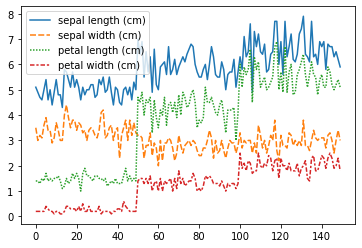

In [64]:
# seaborn line chart 
sns.lineplot(data=iris_df.drop('target',axis=1))

### Plotnine
For plotting multiple line charts with **geom_line()***, you will need to do a little data manipulation to get into a format for ggplot mappings.

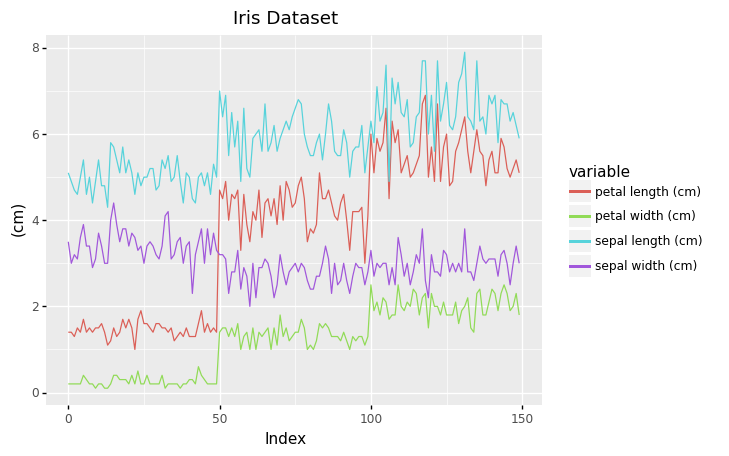

<ggplot: (8734537518833)>

In [66]:
cleaned_data = iris_df.drop(['target', 'class'], axis=1)
cleaned_data['Index'] = cleaned_data.index.tolist()
cleaned_data =  cleaned_data.melt(id_vars=['Index'], value_vars=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], value_name = '(cm)')
(ggplot(cleaned_data)
    + aes(x='Index', y='(cm)', color='variable')
    + geom_line()
    + labs(title='Iris Dataset')
)

# Histograms
Histograms are useful for a large number of unique values in a dataset.  The values are sorted into intervals, called bins.  From histograms we can understand the distribution (aka frequency) of the data.

### Matplotlib
Use method **hist**.

Text(0, 0.5, 'Frequency')

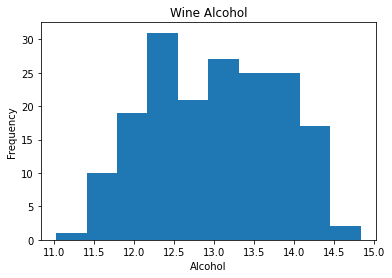

In [67]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(wine_df.alcohol)
# set title and labels
ax.set_title('Wine Alcohol')
ax.set_xlabel('Alcohol')
ax.set_ylabel('Frequency')

### Pandas
Create Pandas hist with **plot.hist** - no parameters required.

<AxesSubplot:title={'center':'Wine Alcohol'}, ylabel='Frequency'>

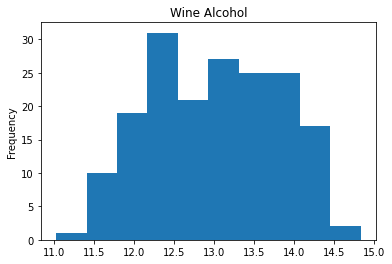

In [73]:
# histogram using Pandas
wine_df['alcohol'].plot.hist(title='Wine Alcohol')

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

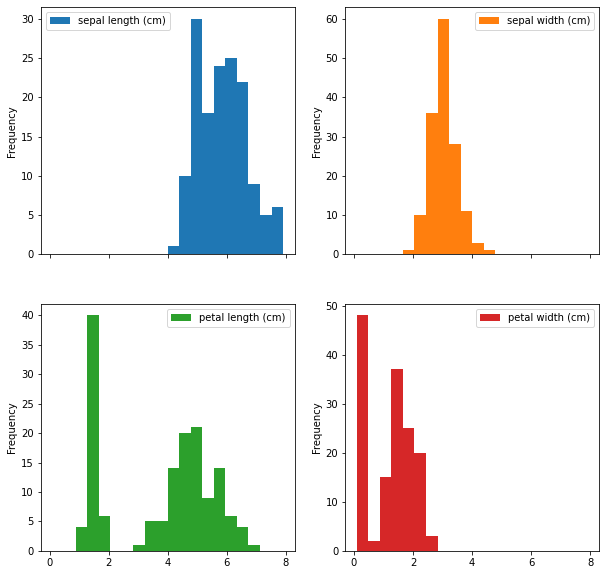

In [74]:
# Also easily create mulitple plots 
iris_df.drop(['target', 'class'], axis=1).plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)


### Seaborn 
Seaborn uses method **sns.distplot** with many additional parameters.

/home/rpeterson/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 1.0, 'Wine Alcohol')

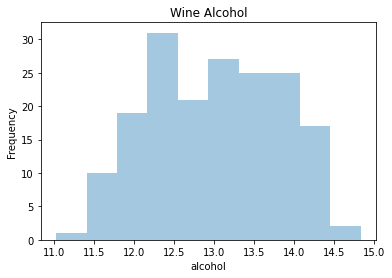

In [79]:
# sns histogram
sns.distplot(wine_df['alcohol'], bins=10, kde=False)
plt.ylabel('Frequency')
plt.title('Wine Alcohol')


/home/rpeterson/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 1.0, 'Wine Alcohol')

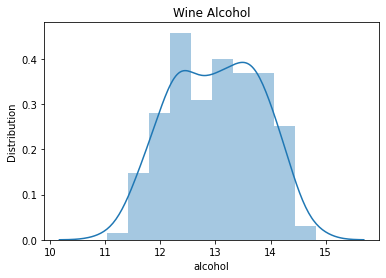

In [85]:
# sns histogram with kernel density estimate
sns.distplot(wine_df['alcohol'], bins=10, kde=True)
plt.ylabel('Distribution')
plt.title('Wine Alcohol')


### Plotnine
Use **geom_histogram**

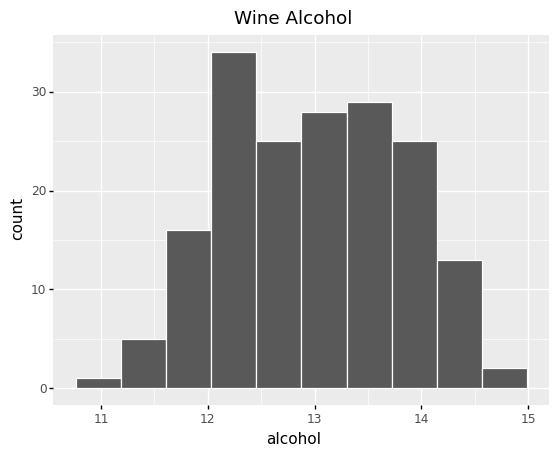

<ggplot: (8734531944945)>

In [86]:
(ggplot(wine_df)
    + aes(x='alcohol')
    + geom_histogram(color='white', bins=10)
    + labs(title='Wine Alcohol')
)

Like seaborn, plotnine can be extended to display the probability density using **geom_density()**.

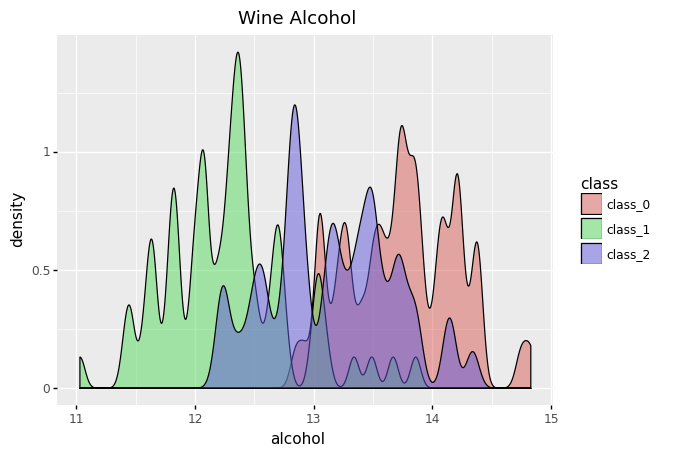

<ggplot: (8734531912442)>

In [87]:
(ggplot(wine_df)
    + aes(x='alcohol', fill='class')
    + geom_density(adjust=1/4, alpha=0.5)
    + labs(title='Wine Alcohol')
)

# Bar Charts
Bar charts illustrate data corresponding to given labels or discrete numeric values (like pies charts).  These charts are good when there is low cardinality (not a lot of categories)

### Matplotlib
Use the **bar** method, with the caveat that you need to manually calculate the frequencies of the categories you are interested in which can be done using **value_counts**.

Text(0, 0.5, 'Count')

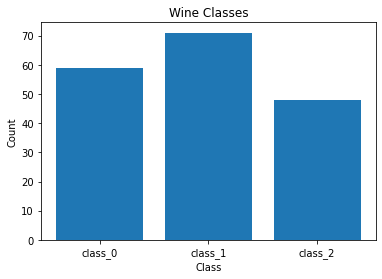

In [105]:
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = wine_df['class'].value_counts().sort_index()
# get x and y data 
alcohol = data.index
frequency = data.values 
# create bar chart 
ax.bar(alcohol,frequency)

# set title and labels 
ax.set_title('Wine Classes') 
ax.set_xlabel('Class') 
ax.set_ylabel('Count')

In [104]:
data


class_1    71
class_0    59
class_2    48
Name: class, dtype: int64

# Pandas
Use **plot.bar()** method, but like with matplotlib this method requires that we need to count the occurrences using **value_counts** and sort using **sort_index**.

Text(0, 0.5, 'Count')

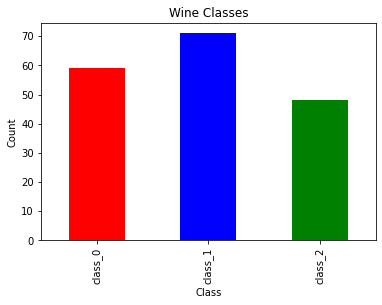

In [96]:

wine_df['class'].value_counts().sort_index().plot.bar(color=['red','blue','green'])

plt.title('Wine Classes')
plt.xlabel('Class')
plt.ylabel('Count')


Text(0.5, 0, 'Count')

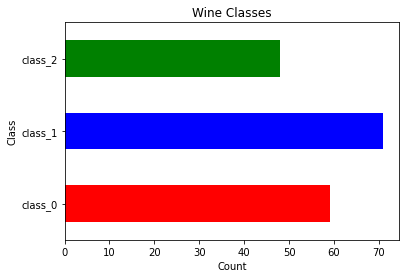

In [106]:
wine_df['class'].value_counts().sort_index().plot.barh(color=['red', 'blue', 'green'])
plt.title('Wine Classes')
plt.ylabel('Class')
plt.xlabel('Count')

In [115]:
wine_df.groupby('class').alcohol.mean().sort_values()[:2]#.plot.bar()

class
class_1    12.278732
class_2    13.153750
Name: alcohol, dtype: float64

Text(0, 0.5, 'Average Alcohol')

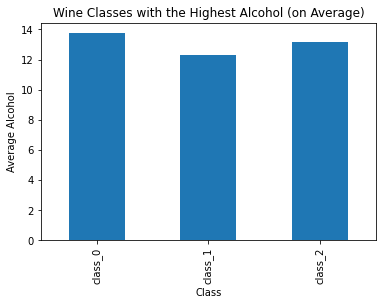

In [111]:
wine_df.groupby('class').alcohol.mean().plot.bar()
plt.title('Wine Classes with the Highest Alcohol (on Average)')
plt.xlabel('Class')
plt.ylabel('Average Alcohol')

### Seaborn
Use **.countplot** to create a bar-chart, no need to do any data manipulation :) 

/home/rpeterson/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Text(0.5, 1.0, 'Wine Class')

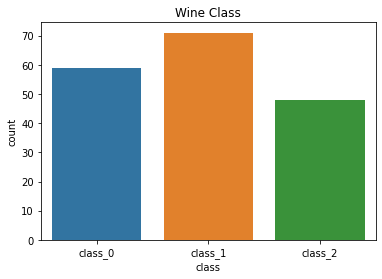

In [116]:
sns.countplot(wine_df['class'])
plt.title('Wine Class')

### Plotnine
Use **geom_bar()** with plotnine 

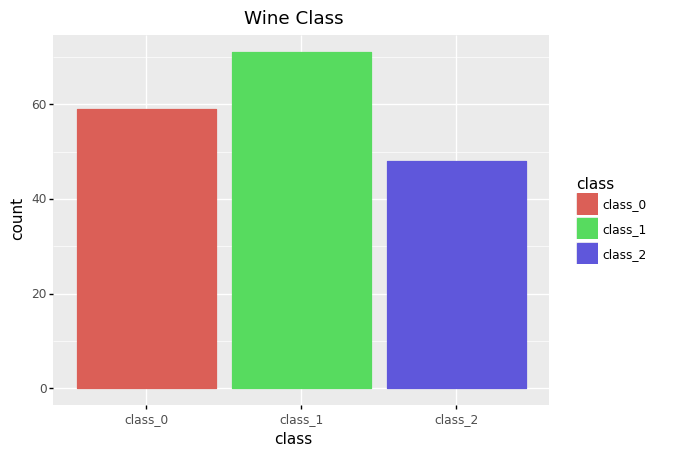

<ggplot: (8734538855557)>

In [117]:
(ggplot(wine_df)
    + aes(x='class', color='class', fill='class')
    + geom_bar()
    + labs(title='Wine Class')
)

# Box Plots
Box plots (and violin plots) are excellent for visualizing descriptive statistics of a dataset since they show the range, interquartile range, median, mode, outliers and all quartiles.

### Matplotlib 
Use the method **boxplot()**.  In order to display multiple columns in one figure we need to construct an array of data.

Text(0, 0.5, 'cm')

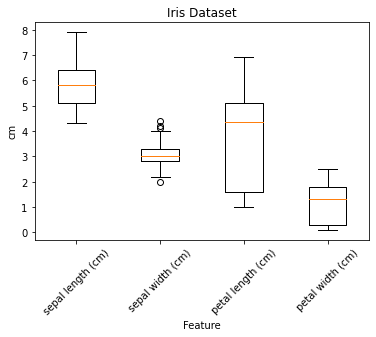

In [122]:
# get columns to plot
columns = iris_df.columns.drop(['target', 'class'])
data = []
for column in columns:
    data.append(iris_df[column])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
# ax.boxplot(data)
#or
ax.boxplot(iris_df[columns])
# set title and legend
ax.set_title('Iris Dataset')
ax.set_xticklabels(columns, rotation=45)
ax.set_xlabel('Feature')
ax.set_ylabel('cm')

In [120]:
print(type(data))
print(type(data[0]))

<class 'list'>
<class 'pandas.core.series.Series'>


### Pandas
Use **.boxplot()** to create boxplot from Pandas dataframe.

Text(0, 0.5, 'cm')

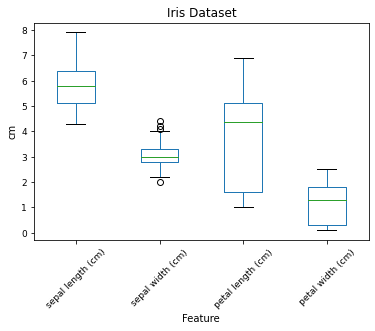

In [125]:
iris_df.drop('target',axis=1).boxplot(grid=False, rot=45, fontsize=9)
plt.title('Iris Dataset')
plt.xlabel('Feature')
plt.ylabel('cm')

### Seaborn
Just need **sns.boxplot()** method to create amazing boxplots

Text(0, 0.5, 'cm')

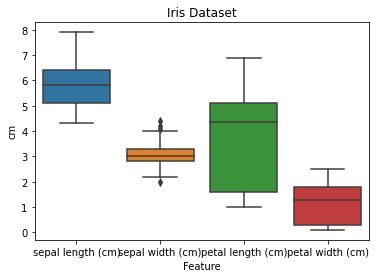

In [126]:
sns.boxplot(data=iris_df.drop(['target', 'class'], axis=1))
plt.title('Iris Dataset')
plt.xlabel('Feature')
plt.ylabel('cm')

Text(0.5, 1.0, 'Iris Dataset')

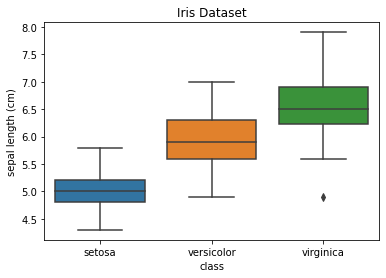

In [134]:
# Boxplots are also useful for viewing the different statistics of a feature broken down by class
# iris_df.boxplot(column=spl_len_str,by='class')
sns.boxplot(x="class", y="sepal length (cm)", data=iris_df)
plt.title('Iris Dataset')
# plt.ylabel(spl_len_str)

Text(0.5, 1.0, 'Iris Dataset')

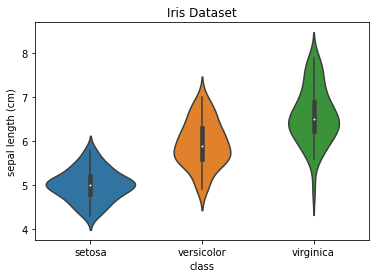

In [135]:
# Alternative to box plot is a violin plot showing 
# the kernel density estimation underlying the distribution
sns.violinplot(x="class", y="sepal length (cm)", data=iris_df)
plt.title('Iris Dataset')

# Pie Charts
Represent data with a small number of labels and given relative frequencies.  

### Matplotlib
Use **plt.pie** method to create a pie chart.

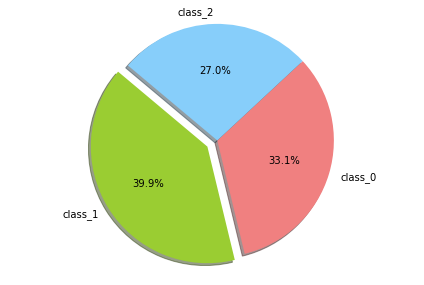

In [138]:
#first create data arrays 
data = wine_df['class'].value_counts()
labels = data.index.tolist()
sizes = data.values
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.tight_layout()
plt.axis('equal')
plt.show()

### Pandas
Use the method **.plot.pie** on a dataframe.

<AxesSubplot:ylabel='class'>

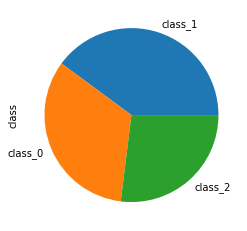

In [139]:
wine_df['class'].value_counts().plot.pie()

### Seaborn 
Sorry but seaborn does not have a piechart method :( 

### Plotnine 
Does not support ggplot coord_polar class 

In [36]:
# If coord_polar existed in plotnine the ggplot code would look something like this:
# data_counts = wine_df['class'].value_counts(normalize=True).rename_axis('class').reset_index(name='percent')
# data_counts['percent'] = round(100*data_counts['percent'])
# (ggplot(data_counts) 
#   + aes(x = "class", y='percent', fill ='class')
#   + geom_bar(width = 1, stat = "identity") 
#   + coord_polar(theta ='percent')
# )

# Heatmaps
Heatmaps can visually represent a matrix.  The colors represent the numbers or elements of the matrix.  They are used for showing covariance and correlation matrices. Pandas **.corr()** allows you to easily create a correlation matrix or you can use numpy **np.corrcoef** method.

### Matplotlib
Use Pandas correlation **.corr()** to easily get the correlation of features inside a dataframe and results in a correlation matrix.

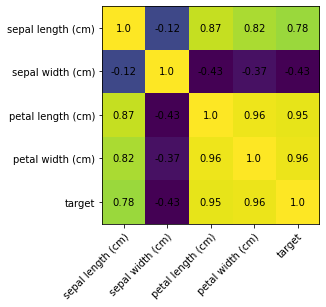

In [141]:
# get correlation matrix
corr = iris_df.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr)
# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="black")

### Pandas 
Although Pandas lets you quickly calculate the correlation matrix, you will need Matplotlib or Seaborn to plot the heatmap.

### Seaborn
The best and easiest way to create a heatmap!! 

<AxesSubplot:>

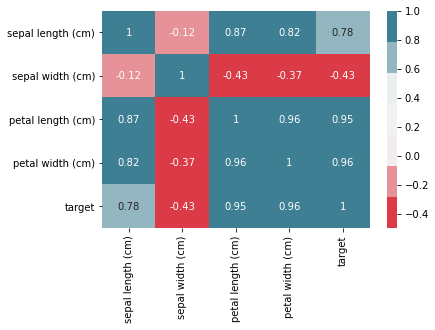

In [148]:
sns.heatmap(iris_df.corr(),annot=True,
           cmap=sns.diverging_palette(10, 220, sep=80, n=7),
            vmin = -0.5,
            vmax = 1)

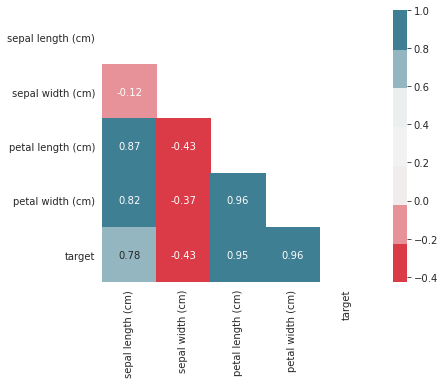

In [149]:
# Add a mask so you don't show redundant information
mask = np.zeros_like(iris_df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True,
                     annot=True,
                     cmap=sns.diverging_palette(10, 220, sep=80, n=7))

### Plotnine
Use method **geom_tile()** and any themes you like :) 

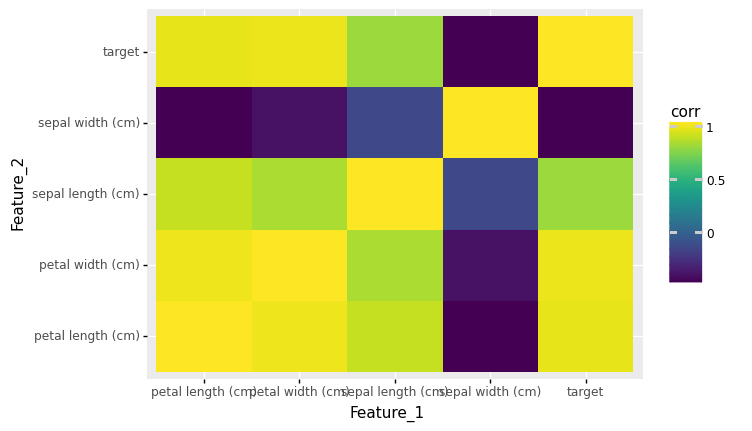

<ggplot: (8734532285468)>

In [150]:
#Start by stacking the correlation dataframe matrix for the heatmap
corr = iris_df.corr().stack().reset_index()
corr.columns = ['Feature_1','Feature_2','corr']

(ggplot(corr) 
   + aes(x = "Feature_1", y='Feature_2', fill ='corr')
   + geom_tile() 
)

# Faceting 
Faceting allows you to break the data variables up across multiple subplots and combine into a single feature.  This will allow you to quickly explore and visualize your datasets.  Faceting is available in Seaborn and Plotnine.

### Seaborn
Faceting in Seaborn uses a FacetGrid,  You first define the **FacetGrid** and pass the data and column which you want to use to split your data.   Then use the **map** function on the FacetGrid object to make the multiple subplots with the different slices of data.

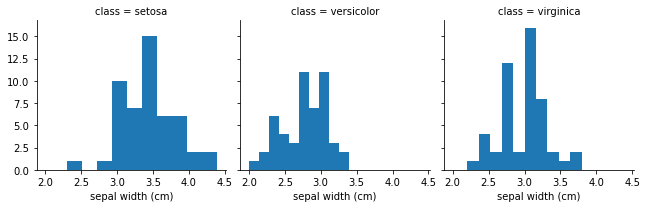

In [151]:
# Create FacetGrid

# use map function with a histogram

g = sns.FacetGrid(iris_df.drop(['target'], axis=1), col='class')
g = g.map(plt.hist, 'sepal width (cm)')

### Plotnine
Use **facet_wrap** to do similar process.

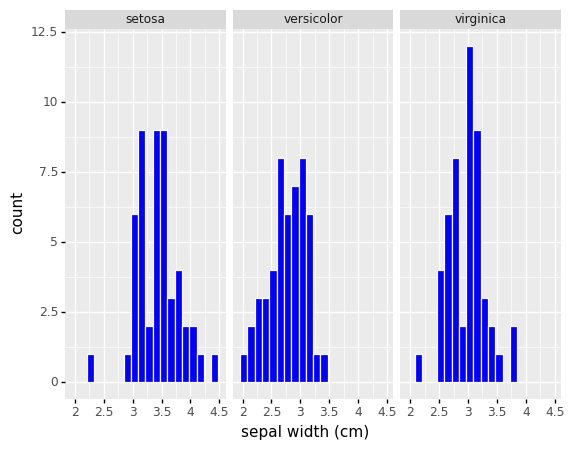

<ggplot: (8734530380343)>

In [152]:
(ggplot(iris_df)
    + aes(x='sepal width (cm)')
    + geom_histogram(fill = 'blue', color='white', bins=20)
    + facet_wrap(('class', ), dir='v')
)

# Pairwise Data Compairson
Pandas and Seaborn both have methods to plot pairwise relationships in your dataset - which can be extremely useful - just be careful for large datasets. 

### Pandas 
Pandas has a **scatter_matrix** which makes it easy to 


<ipython-input-154-acdf5f3290da>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared


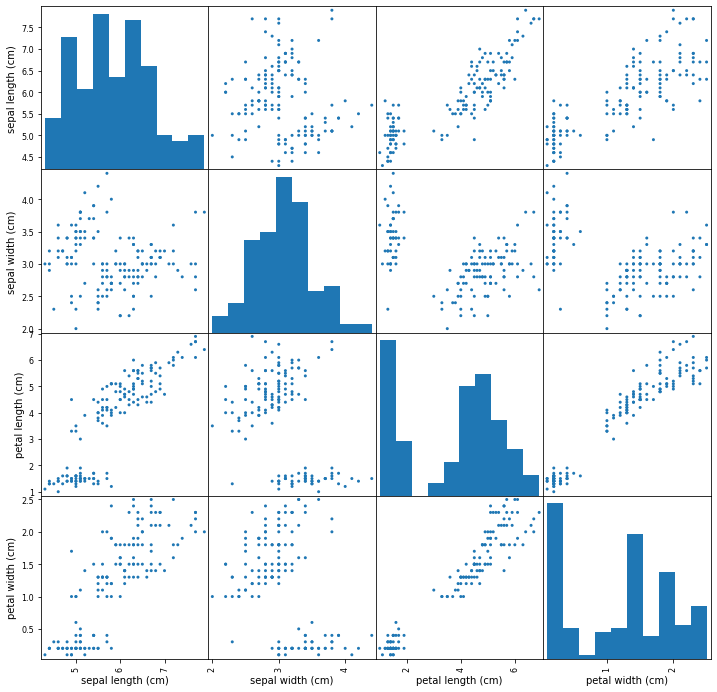

In [154]:
fig, ax = plt.subplots(figsize=(12,12))
# img = pd.plotting.scatter_matrix()
img = pd.plotting.scatter_matrix(iris_df.drop(['target', 'class'], axis=1), alpha=1, ax=ax)

### Seaborn 
Seaborn also has a very useful **pairplot** method that automatically plots a grid of pairwise relationships in the dataset.  

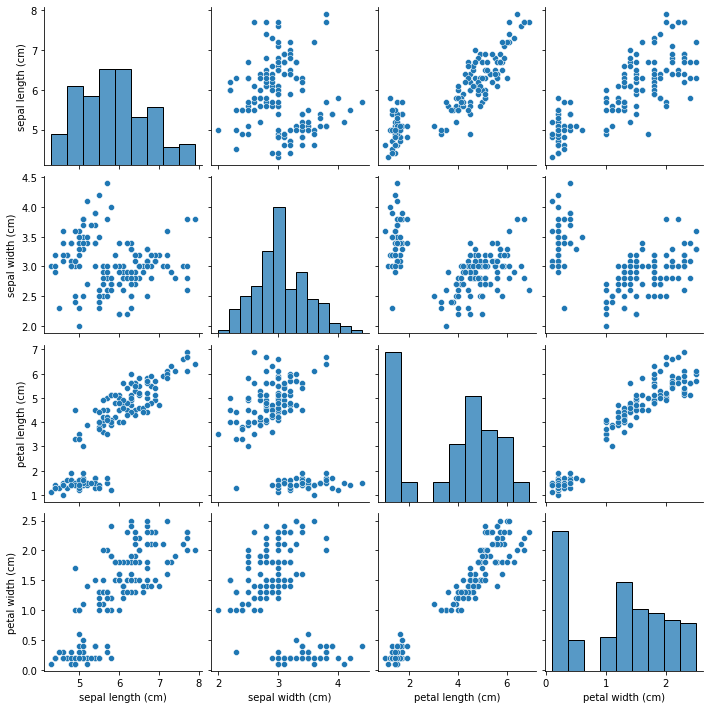

In [155]:
sns.pairplot(iris_df.drop(['target', 'class'], axis=1))